In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np


Exploratory Data Analysis

In [84]:
catch22 = pd.read_csv("./data/metadata/catch22.csv", index_col=0)
tsfeatures = pd.read_csv("./data/metadata/tsfeatures.csv", index_col=0)
tsfel = pd.read_csv("./data/metadata/tsfel.csv", index_col=0)
tsfresh = pd.read_csv("./data/metadata/tsfresh.csv", index_col=0)

In [85]:
print(catch22.shape)
catch22.head()

(5000, 23)


,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,target
unique_id,,,,,,,,,,,,,,,,,,,,,
M1,-0.210122,-0.511695,26.211182,4,0.325476,0.067122,0.910256,56.0,0.023333,4,...,0.772921,0.206823,0.868549,7.0,1.767668,0.130435,0.130435,0.049087,0.608348,NHITS
M10,-0.679885,-0.868304,65.057542,186,1.116667,0.001636,0.241096,102.0,0.074074,0,...,-0.849727,0.349727,0.985496,17.0,1.264635,0.866667,0.800000,0.012272,0.086558,MLP
M100,-1.066193,-1.201893,63.318476,159,1.225611,0.000037,0.202749,156.0,0.074074,0,...,0.465753,-0.616438,0.991889,9.0,1.281500,0.863636,0.681818,0.012272,0.047681,MLP
M1000,0.400262,0.091092,35.456119,1,0.490411,-0.204548,0.848024,103.0,0.040000,11,...,0.118182,0.669697,0.925730,5.0,1.557747,0.133333,0.844444,0.036816,0.385337,MLP
M10000,-0.851404,-0.638685,12.288988,44,0.794078,-0.066460,0.808824,27.0,0.111111,14,...,-0.550725,0.521739,0.923155,10.0,1.466970,0.724138,0.482759,0.098175,0.417646,TCN


In [86]:
print(tsfel.shape)
tsfel.head()

(5000, 165)


,Absolute energy,Area under the curve,Autocorrelation,Average power,Centroid,ECDF Percentile Count_0,ECDF Percentile Count_1,ECDF Percentile_0,ECDF Percentile_1,ECDF_0,...,Wavelet variance_1,Wavelet variance_2,Wavelet variance_3,Wavelet variance_4,Wavelet variance_5,Wavelet variance_6,Wavelet variance_7,Wavelet variance_8,Zero crossing rate,target
unique_id,,,,,,,,,,,,,,,,,,,,,
M13202,7.902212e+08,2795.76,26.0,7.823973e+08,0.564328,20.0,81.0,2396.0,3068.0,0.009804,...,2.012234e+05,4.151755e+05,6.651500e+05,9.603193e+05,1.307266e+06,1.680106e+06,2.046582e+06,2.390615e+06,0.0,NHITS
M11415,4.427023e+08,2545.69,16.0,2.971157e+08,0.817890,30.0,120.0,1578.0,1811.0,0.006667,...,7.302092e+04,1.579815e+05,2.710873e+05,4.027692e+05,5.373108e+05,6.686503e+05,7.997170e+05,9.363265e+05,0.0,NHITS
M1173,1.406237e+10,20415.25,41.0,4.610613e+09,1.589509,61.0,244.0,5640.0,7930.0,0.003268,...,6.344223e+05,1.251554e+06,1.521601e+06,1.853921e+06,2.488746e+06,3.337972e+06,4.326078e+06,5.400477e+06,0.0,TCN
M11373,4.524813e+09,11675.05,50.0,1.483545e+09,1.641647,61.0,244.0,3520.0,4140.0,0.003268,...,1.118919e+05,2.423797e+05,4.353068e+05,6.876174e+05,9.887845e+05,1.325767e+06,1.686884e+06,2.065370e+06,0.0,MLP
M13564,3.773350e+10,18995.80,26.0,2.039648e+10,0.666607,37.0,148.0,2650.0,20730.0,0.005376,...,1.066749e+07,2.403936e+07,4.723346e+07,7.478835e+07,1.038092e+08,1.334808e+08,1.663704e+08,2.088767e+08,0.0,DeepAR


In [87]:
print(tsfresh.shape)
tsfresh.head()

(5000, 784)


,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,...,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,y__mean_n_absolute_max__number_of_maxima_7,target
unique_id,,,,,,,,,,,,,,,,,,,,,
M1,1.0,0.0,0.0,1.0,2957630.0,2.015209e+10,643.824786,-2.371795,1.745182,6040.00,...,0.280179,0.741299,1.695340,2.890956,4.149929,5.213011,5.770251,0.0,12345.714286,NHITS
M10,1.0,0.0,0.0,1.0,3567860.0,3.795868e+10,100.027397,-28.301370,-0.302198,8490.00,...,0.045395,0.181214,1.525701,2.467896,3.401099,4.102035,4.568212,0.0,17578.571429,MLP
M100,1.0,0.0,0.0,1.0,480725.7,8.707210e+08,13.406873,4.010309,-0.023103,1828.05,...,0.090729,0.090729,1.605990,2.583995,3.544319,4.245886,4.643323,0.0,2355.357143,MLP
M1000,1.0,0.0,0.0,1.0,876160.0,3.217971e+09,409.179331,-8.328267,1.265244,2610.00,...,0.136002,0.669047,1.790399,3.119350,4.459500,5.316329,5.694604,0.0,7898.571429,MLP
M10000,1.0,0.0,0.0,1.0,243270.0,9.612367e+08,226.764706,-18.823529,-1.417910,3000.00,...,0.258641,0.933629,1.582735,2.507699,3.237588,3.683253,3.883374,0.0,5965.714286,TCN


Preparation for metalearning analysis

In [88]:
tsfeatures = tsfeatures.dropna(axis=1)
print(tsfeatures.shape)
tsfeatures.head()

(5000, 38)


,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,seasonal_period,trend,...,crossing_points,arch_lm,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1,target
unique_id,,,,,,,,,,,,,,,,,,,,,
M1,469,-42.538268,0.896207,0.456604,7.668990e-13,2.428589e-01,0.740397,1,12,0.947735,...,74,0.767423,0.883521,4.516663,0.068425,0.429833,-0.396282,0.460473,0.829358,NHITS
M10,366,-3.254627,4.613977,1.000000,7.250465e-03,4.234732e-09,1.020374,1,12,0.995744,...,5,0.988784,0.987703,8.613847,-0.006698,0.027870,-0.455875,0.266991,0.841621,MLP
M100,292,-0.571397,4.300606,0.618200,1.453294e-01,1.977321e-01,1.034931,1,12,0.999648,...,1,0.991648,0.995060,9.412629,0.117622,0.282456,-0.623757,0.558651,0.928043,MLP
M1000,330,-17.888515,1.623673,0.445526,0.000000e+00,4.783829e-14,0.924898,1,12,0.927782,...,23,0.486194,0.904101,6.938955,-0.511830,0.343676,-0.738341,0.711362,0.763840,MLP
M10000,69,-3.567934,1.345909,1.000000,0.000000e+00,9.039482e-11,0.980363,1,12,0.927146,...,3,0.585071,0.947217,5.314680,0.147034,0.132224,-0.343419,0.385734,0.381649,TCN


In [89]:
all_metafeatures = pd.concat([catch22, tsfeatures, tsfel, tsfresh], axis=1, copy=False)

In [90]:
cv =  StratifiedKFold(n_splits = 10, shuffle = True, random_state = 14)

X_catch22 = catch22.drop(["target"], axis=1)
y_catch22 = catch22["target"]
X_tsfeatures = tsfeatures.drop(["target"], axis=1)
y_tsfeatures = tsfeatures["target"]
X_tsfel = tsfel.drop(["target"], axis=1)
y_tsfel = tsfel["target"]
X_tsfresh = tsfresh.drop(["target"], axis=1)
y_tsfresh = tsfresh["target"]
X_all = all_metafeatures.drop(["target"], axis=1)
y_all = all_metafeatures["target"].iloc[:,0]

In [91]:
y_all.value_counts()

target
NHITS     1739
MLP       1534
DeepAR     946
TCN        781
Name: count, dtype: int64

Performance evaluation

In [92]:
clf = RandomForestClassifier(class_weight="balanced", random_state=14)

In [93]:
bac = {
    "TSFEL": list(),
    "TSFRESH": list(),
    "TSFEATURES": list(),
    "Catch22": list(),
    "All": list()
}

base_perf = pd.read_csv("./data/base_performance/mae.csv", index_col=0)

bac["Catch22"] = cross_val_score(clf, X_catch22, y_catch22, cv=cv, scoring="balanced_accuracy")
bac["TSFRESH"] = cross_val_score(clf, X_tsfresh, y_tsfresh, cv=cv, scoring="balanced_accuracy")
bac["TSFEL"] = cross_val_score(clf, X_tsfel, y_tsfel, cv=cv, scoring="balanced_accuracy")
bac["TSFEATURES"] = cross_val_score(clf, X_tsfeatures, y_tsfeatures, cv=cv, scoring="balanced_accuracy")
bac["All"] = cross_val_score(clf, X_all, y_all, cv=cv, scoring="balanced_accuracy")

In [94]:
index_test_catch22 = list()
catch22_predictions = list()

index_test_tsfel = list()
tsfel_predictions = list()

index_test_tsfeatures = list()
tsfeatures_predictions = list()

index_test_tsfresh = list()
tsfresh_predictions = list()

index_test_all = list()
all_predictions = list()

for i, (train_index, test_index) in enumerate(cv.split(X_tsfel, y_tsfel)):
    clf.fit(X_catch22.iloc[train_index,:], y_catch22.iloc[train_index])
    catch22_pred = clf.predict(X_catch22.iloc[test_index,:])
    index_test_catch22.append(X_catch22.iloc[test_index,:].index.to_list())
    catch22_predictions.append(catch22_pred)

    clf.fit(X_tsfel.iloc[train_index,:], y_tsfel.iloc[train_index])
    tsfel_pred = clf.predict(X_tsfel.iloc[test_index,:])
    index_test_tsfel.append(X_tsfel.iloc[test_index,:].index.to_list())
    tsfel_predictions.append(tsfel_pred)

    clf.fit(X_tsfeatures.iloc[train_index,:], y_tsfeatures.iloc[train_index])
    tsfeatures_pred = clf.predict(X_tsfeatures.iloc[test_index,:])
    index_test_tsfeatures.append(X_tsfeatures.iloc[test_index,:].index.to_list())
    tsfeatures_predictions.append(tsfeatures_pred)

    clf.fit(X_tsfresh.iloc[train_index,:], y_tsfresh.iloc[train_index])
    tsfresh_pred = clf.predict(X_tsfresh.iloc[test_index,:])
    index_test_tsfresh.append(X_tsfresh.iloc[test_index,:].index.to_list())
    tsfresh_predictions.append(tsfresh_pred)

    clf.fit(X_all.iloc[train_index,:], y_all.iloc[train_index])
    all_pred = clf.predict(X_all.iloc[test_index,:])
    index_test_all.append(X_all.iloc[test_index,:].index.to_list())
    all_predictions.append(all_pred)


In [95]:
base_performance_indices = {
    "Index_catch22": np.array(index_test_catch22).flatten(), 
    "target_catch22": np.array(catch22_predictions).flatten(), 
    "Index_tsfel": np.array(index_test_tsfel).flatten(),
    "target_tsfel": np.array(tsfel_predictions).flatten(),
    "Index_tsfeatures": np.array(index_test_tsfeatures).flatten(),
    "target_tsfeatures": np.array(tsfeatures_predictions).flatten(),
    "Index_tsfresh": np.array(index_test_tsfresh).flatten(),
    "target_tsfresh": np.array(tsfresh_predictions).flatten(),
    "Index_all": np.array(index_test_all).flatten(),
    "target_all": np.array(all_predictions).flatten()  
}
base_performance_indices = pd.DataFrame(base_performance_indices)

In [96]:
mae_final = {
    "Catch22": list(),
    "TSFEL": list(),
    "TSFRESH": list(),
    "TSFEATURES": list(),
    "All": list(),
    # "MLP": base_perf["MLP"].values.tolist(),
    # "NHITS": base_perf["NHITS"].values.tolist(),
    # "DeepAR": base_perf["DeepAR"].values.tolist(),
    # "TCN": base_perf["TCN"].values.tolist()
}

In [97]:
for idx, row in base_performance_indices.iterrows():
    index = row['Index_catch22']
    column = row['target_catch22']
    mae_final["Catch22"].append(base_perf.at[index, column])

    index = row['Index_tsfel']
    column = row['target_tsfel']
    mae_final["TSFEL"].append(base_perf.at[index, column]) 

    index = row['Index_tsfeatures']
    column = row['target_tsfeatures']
    mae_final["TSFEATURES"].append(base_perf.at[index, column]) 

    index = row['Index_tsfresh']
    column = row['target_tsfresh']
    mae_final["TSFRESH"].append(base_perf.at[index, column]) 

    index = row['Index_all']
    column = row['target_all']
    mae_final["All"].append(base_perf.at[index, column]) 

In [98]:
mae_final = pd.DataFrame(mae_final)
bac_final = pd.DataFrame(bac)

In [99]:
from MCM import MCM

MCM.compare(
        output_dir="./",
        df_results=mae_final,
        pdf_savename="heatmap",
        png_savename="heatmap",
        used_statistic="MAE",
        font_size=16,
        order_WinTieLoss="lower",
        order_better = "increasing"
    )

Processing All, TSFEATURES:   0%|          | 0/5 [00:00<?, ?it/s]    


In [100]:
MCM.compare(
        output_dir="./",
        df_results=bac_final,
        pdf_savename="heatmap2",
        png_savename="heatmap",
        used_statistic="Balanced Accuracy",
        font_size=16
    )

Processing All, Catch22:   0%|          | 0/5 [00:00<?, ?it/s]       


In [101]:
clf.fit(X_all, y_all)

RandomForestClassifier(class_weight='balanced', random_state=14)

In [102]:
importances = pd.DataFrame({"feature": clf.feature_names_in_, "importance": clf.feature_importances_}).sort_values(by="importance", ascending=False)
name_tsfresh = X_tsfresh.columns
name_tsfel = X_tsfel.columns
name_catch22 = X_catch22.columns
name_tsfeatures = X_tsfeatures.columns

In [103]:
total_importance = importances['importance'].sum()
def calculate_importance_ratio(names, dataframe):
    filtered_df = dataframe[dataframe['feature'].isin(names)]
    importance_sum = filtered_df['importance'].sum()
    importance_ratio = importance_sum / total_importance
    return importance_ratio

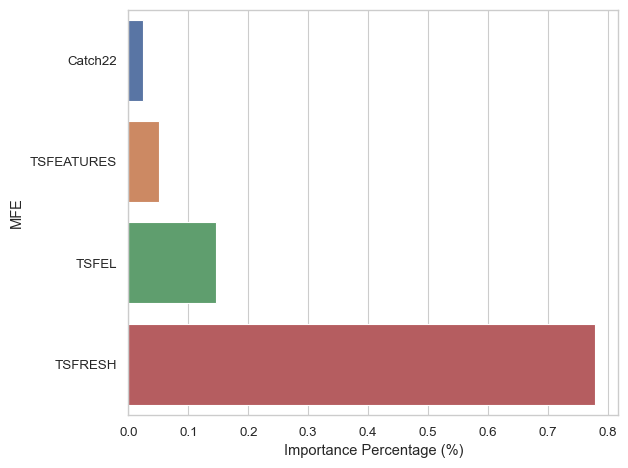

In [104]:
imp = [calculate_importance_ratio(name_catch22, importances),calculate_importance_ratio(name_tsfeatures, importances),calculate_importance_ratio(name_tsfel, importances),calculate_importance_ratio(name_tsfresh, importances)]
mfe = ["Catch22", "TSFEATURES", "TSFEL","TSFRESH"]
results_bar = pd.DataFrame({"MFE": mfe, "Importance Percentage (%)": imp})

plt.figure()
sns.barplot(x="Importance Percentage (%)", y="MFE", hue="MFE", data=results_bar, orient='h')
plt.savefig("./barplot.pdf")

In [105]:
shape = np.array([X_catch22.shape[1], X_tsfel.shape[1], X_tsfresh.shape[1], X_tsfeatures.shape[1], X_all.shape[1]])
mae_metalearn = mae_final.mean()[:5]

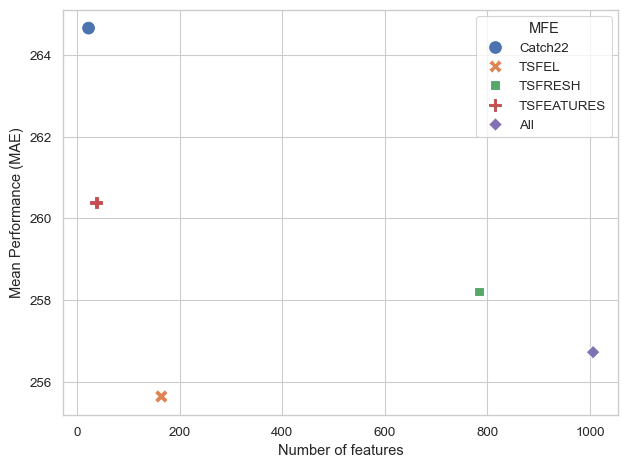

In [106]:
sns.set(style="whitegrid", context="paper", font_scale=1.1)
results_df = pd.DataFrame({"Number of features": shape, "Mean Performance (MAE)": mae_metalearn}, index=mae_metalearn.index)
results_df.index.name = "MFE"
results_df = results_df.reset_index()
plt.figure()
sns.scatterplot(x="Number of features", y="Mean Performance (MAE)", hue="MFE", style="MFE", data=results_df, s=100)
plt.savefig("./result.pdf")